In [108]:
import pandas as pd
b = pd.read_csv(r"E:\\Data Science\\Datasets\\Fake_News_Detection-master\\Fake_News_Detection-master\\train.csv")
b.head()

,Statement,Label
0,Says the Annies List political group supports ...,False
1,When did the decline of coal start? It started...,True
2,"Hillary Clinton agrees with John McCain ""by vo...",True
3,Health care reform legislation is likely to ma...,False
4,The economic turnaround started at the end of ...,True


In [109]:
b.isnull().sum()

Statement    0
Label        0
dtype: int64

In [110]:
#Testing Balance
print(b[b["Label"]==True].count())
print(b[b["Label"]==False].count())

Statement    5752
Label        5752
dtype: int64
Statement    4488
Label        4488
dtype: int64


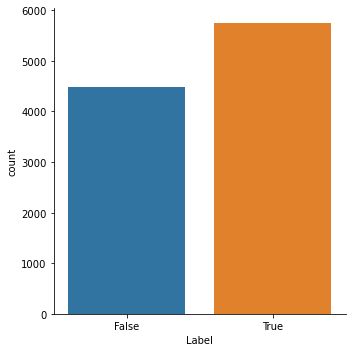

In [111]:
import seaborn as sns
sns.catplot(data = b, x = "Label", kind="count")
import matplotlib.pyplot as plt
plt.show()

In [112]:
#Converting into Lower case
b["Statement"] = b["Statement"].apply(lambda x:x.lower())
b.head()

,Statement,Label
0,says the annies list political group supports ...,False
1,when did the decline of coal start? it started...,True
2,"hillary clinton agrees with john mccain ""by vo...",True
3,health care reform legislation is likely to ma...,False
4,the economic turnaround started at the end of ...,True


In [113]:
#Removing punctuations

import string
def punctuation_remover(text):
    x = [i for i in text if i not in string.punctuation]
    x = "".join(x)
    return x

b["Statement"] = b["Statement"].apply(punctuation_remover)
b

,Statement,Label
0,says the annies list political group supports ...,False
1,when did the decline of coal start it started ...,True
2,hillary clinton agrees with john mccain by vot...,True
3,health care reform legislation is likely to ma...,False
4,the economic turnaround started at the end of ...,True
...,...,...
10235,there are a larger number of shark attacks in ...,True
10236,democrats have now become the party of the atl...,True
10237,says an alternative to social security that op...,True
10238,on lifting the us cuban embargo and allowing t...,False


In [114]:
#removing stopwords

import nltk
nltk.download('stopwords')
eng_stopwords = nltk.corpus.stopwords.words('english')
def with_stopwords(text):
    x = [i for i in text.split(" ") if i not in eng_stopwords]
    y = " ".join(x)
    return y
b["Statement"] = b["Statement"].apply(with_stopwords)
b.head()

[nltk_data] Downloading package stopwords to C:\Users\ZEN
[nltk_data]     MOHANTY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Statement,Label
0,says annies list political group supports thir...,False
1,decline coal start started natural gas took st...,True
2,hillary clinton agrees john mccain voting give...,True
3,health care reform legislation likely mandate ...,False
4,economic turnaround started end term,True


In [115]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\ZEN
[nltk_data]     MOHANTY\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [116]:
#Lemmatizer
from nltk.stem.wordnet import WordNetLemmatizer
wnl = WordNetLemmatizer()
def lemma(texts):
    x = " ".join([wnl.lemmatize(i, "v") for i in texts.split()])
    return x
b ["Statement"] = b["Statement"].apply(lemma)
b

,Statement,Label
0,say annies list political group support thirdt...,False
1,decline coal start start natural gas take star...,True
2,hillary clinton agree john mccain vote give ge...,True
3,health care reform legislation likely mandate ...,False
4,economic turnaround start end term,True
...,...,...
10235,larger number shark attack florida case voter ...,True
10236,democrats become party atlanta metro area black,True
10237,say alternative social security operate galves...,True
10238,lift us cuban embargo allow travel cuba,False


In [117]:
b["Statement"]

0        say annies list political group support thirdt...
1        decline coal start start natural gas take star...
2        hillary clinton agree john mccain vote give ge...
3        health care reform legislation likely mandate ...
4                       economic turnaround start end term
                               ...                        
10235    larger number shark attack florida case voter ...
10236      democrats become party atlanta metro area black
10237    say alternative social security operate galves...
10238              lift us cuban embargo allow travel cuba
10239    department veterans affairs manual tell vetera...
Name: Statement, Length: 10240, dtype: object

In [118]:
!pip install wordcloud
from wordcloud import WordCloud

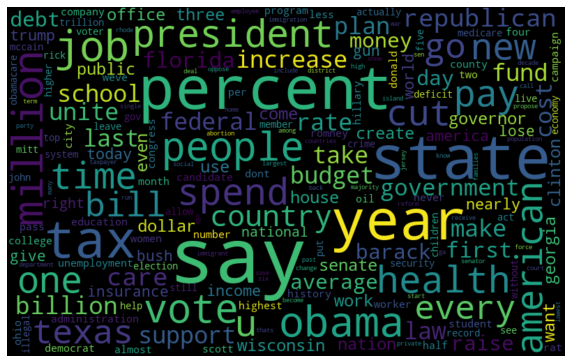

In [119]:
#True statement WordCloud
import matplotlib.pyplot as plt
fake_data =b[(b["Label"]==True)]
all_words = ' '.join([i for i in fake_data.Statement])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110, collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

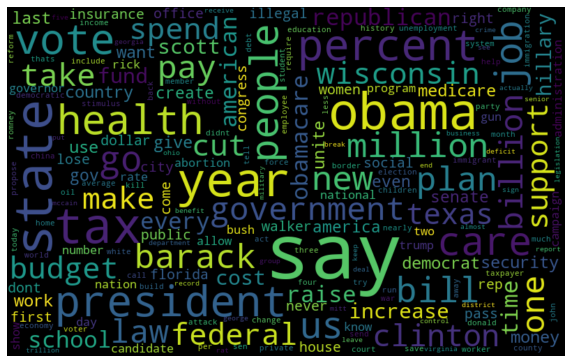

In [120]:
#False statement WordCloud
import matplotlib.pyplot as plt


fake_data =b[(b["Label"]==False)]

all_words = ' '.join([i for i in fake_data.Statement])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110, collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [121]:
b[b["Label"] == False]

,Statement,Label
0,say annies list political group support thirdt...,False
3,health care reform legislation likely mandate ...,False
6,jim dunnam live district represent years,False
12,mitt romney governor massachusetts didnt slow ...,False
14,affordable care act already sense waive otherw...,False
...,...,...
10228,stop smiley cookie pick great cookies family a...,False
10230,supreme court view radically step public opini...,False
10233,mayor fung want punish childrens education rem...,False
10238,lift us cuban embargo allow travel cuba,False


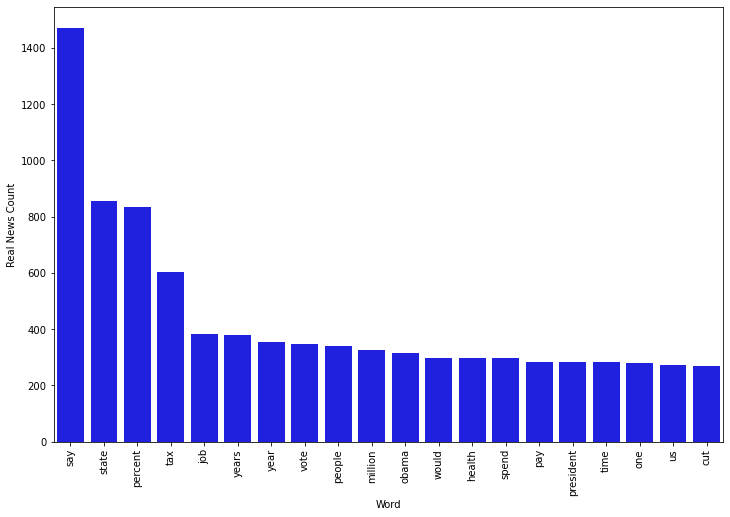

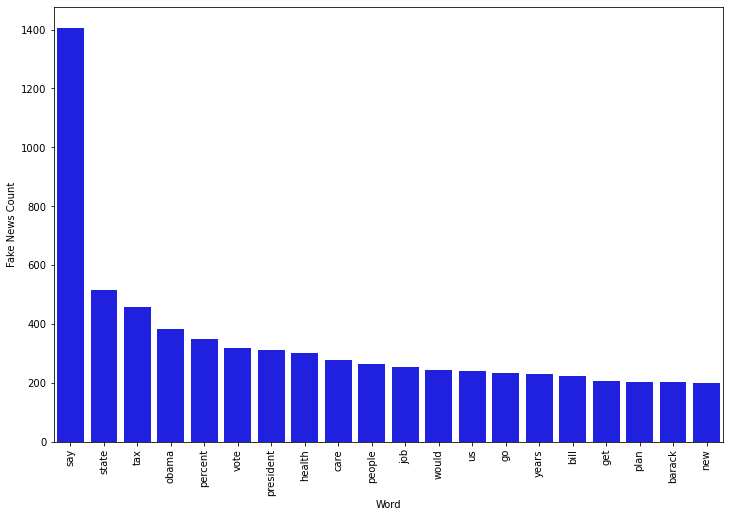

In [124]:
# Most frequent words counter
import nltk

def counter(text, column_text, quantity, label):
    all_words = ' '.join([i for i in text[column_text]])
    all_words_as_list = all_words.split()
    
    frequency = nltk.FreqDist(all_words_as_list)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = label + " Count")
    plt.xticks(rotation='vertical')
    plt.show()
    


# Most frequent words in real news
counter(b[b["Label"] == True], "Statement", 20, "Real News")

# Most frequent words in fake news
counter(b[b["Label"] == False], "Statement", 20, "Fake News")

In [125]:
#Creating X array
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 5000, ngram_range=(1,3))
X = cv.fit_transform(b['Statement']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [126]:
#Creating y array
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = b.iloc[:,1:2].values
y = encoder.fit_transform(y[:, 0:1])
y = y.reshape(-1,1)
y

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([[0],
       [1],
       [1],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [127]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [128]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_pred, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.5947265625